In [1]:
#from feat import Fex
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)
# from feat import Detector
# face_model = "retinaface"
# landmark_model = "MobileFaceNet"#"pfld"#"MobileNet"
# au_model = "svm"#"jaanet"#"rf"
# emotion_model = "rf"#"svm"#"resmasknet"
# detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

/home/devanand/.conda/envs/new/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /home/devanand/.conda/envs/new/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
U

/home/devanand/.conda/envs/new/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/devanand/.conda/envs/new/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/devanand/.conda/envs/new/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.0. This m

Loading emotion model:  resmasknet


In [ ]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os
test_data_dir = get_test_data_path()
test_image = os.path.join(test_data_dir, "input.jpg")

In [2]:
from PIL import Image
#import matplotlib.pyplot as plt
#f, ax = plt.subplots()
#im = Image.open(test_image)
#ax.imshow(im);

In [ ]:
image_prediction = detector.detect_image(test_image)
# Show results
print(image_prediction['anger'][0])
print(image_prediction['disgust'][0])
print(image_prediction['fear'][0])
print(image_prediction['happiness'][0])
print(image_prediction['sadness'][0])
print(image_prediction['surprise'][0])
print(image_prediction['neutral'][0])
#print(image_prediction['anger'][0]+image_prediction['disgust'][0]+image_prediction['fear'][0]+image_prediction['happiness'][0]+image_prediction['sadness'][0]+image_prediction['surprise'][0]+image_prediction['neutral'][0])

In [ ]:
image_prediction.plot_detections();


In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive')

vid_link ='/home/devanand/FACE_VEC/FACE_VEC/yahav_data/Video5_1st half.mp4'
#import dlib
#from imutils.face_utils import FaceAligner
#from imutils.face_utils import rect_to_bb
#import imutils

#MODEL_PATH = '/home/devanandt/Documents/FACE_VEC_LANG/'
#PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"
#MODEL_PATH = './'
#!ls /content/gdrive/MyDrive/FACE_VEC/
#nl=68 #or options = 68 or 194
#PREDICTOR_PATH = MODEL_PATH + 'shape_predictor_'+str(nl)+'_face_landmarks.dat'
#RESIZE_HEIGHT = 480
#NUM_FRAMES_FOR_FPS = 100
#SKIP_FRAMES = 1
#detector = dlib.get_frontal_face_detector()
#landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
#fa = FaceAligner(landmarkDetector, desiredFaceWidth=256)


import numpy as np
import cv2
import matplotlib.pyplot as plt

import math

#all_stabilized_frames=[]
#f_aligned=[]
snapshot=[]

#eyeDistanceNotCalculated = True
#eyeDistance = 0
#isFirstFrame = True
#fps = 10
#showStabilized = False
#count =0

cap = cv2.VideoCapture(vid_link)
#image_frame = []
pt=[]
while(cap.isOpened()):
  ret,im = cap.read()
  if im is None:    
    break
  #snapshot.append(im[:,:,0])
  #imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  snapshot.append(cv2.resize(imGray, (384,256)))#####

cap.release()

In [4]:
anger=[]
disgust=[]
fear=[]
happiness=[]
sadness=[]
surprise=[]
neutral=[]

for i in range(len(snapshot)):
#for i in range(100):
    im = Image.fromarray(snapshot[i][:,:])
    im.save("image.png")
    out = detector.detect_image("image.png")
    anger.append(out['anger'][0])
    disgust.append(out['disgust'][0])
    fear.append(out['fear'][0])
    happiness.append(out['happiness'][0])
    sadness.append(out['sadness'][0])
    surprise.append(out['surprise'][0])
    neutral.append(out['neutral'][0])


/home/devanand/.conda/envs/new/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


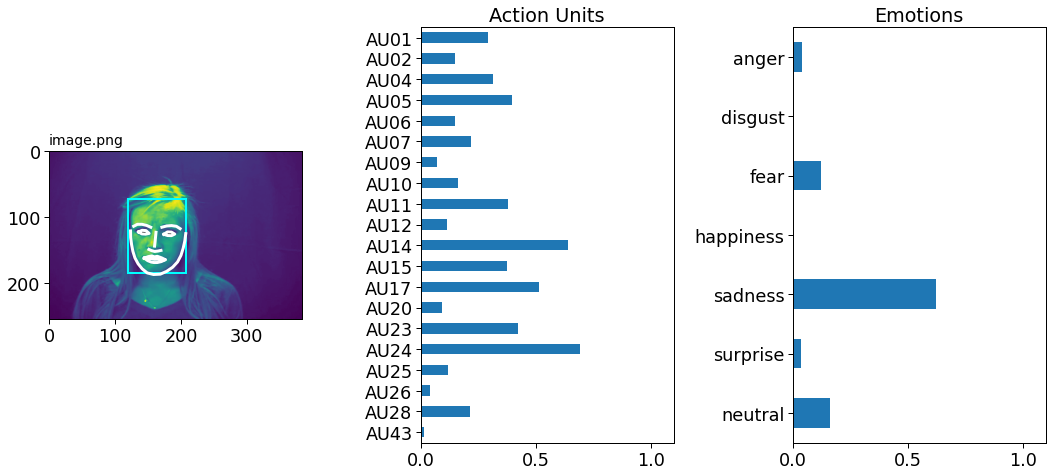

array([<AxesSubplot:title={'left':'image.png'}>,
       <AxesSubplot:title={'center':'Action Units'}>,
       <AxesSubplot:title={'center':'Emotions'}>], dtype=object)

In [5]:
out.plot_detections()

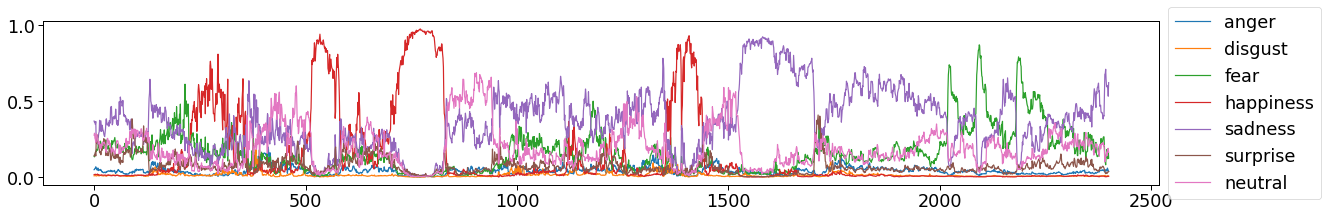

In [6]:
#plt.imshow(snapshot[99][:,:])
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(anger)
plt.plot(disgust)
plt.plot(fear)
plt.plot(happiness)
plt.plot(sadness)
plt.plot(surprise)
plt.plot(neutral)
plt.legend(['anger','disgust','fear','happiness','sadness','surprise','neutral'],loc='center left', bbox_to_anchor=(1, 0.5))


In [7]:
anger_=np.round(anger)
disgust_=np.round(disgust)
fear_=np.round(fear)
happiness_=np.round(happiness)
sadness_=np.round(sadness)
surprise_=np.round(surprise)
neutral_=np.round(neutral)


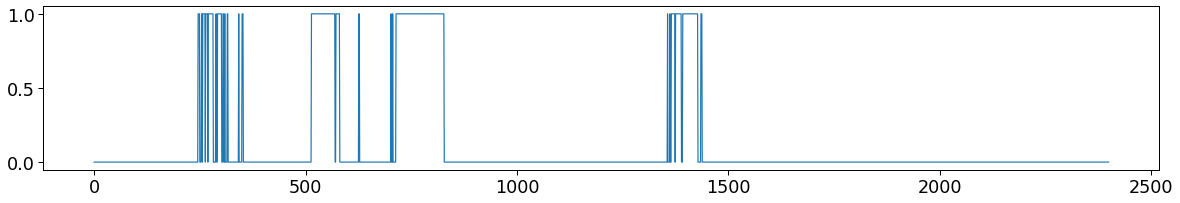

In [58]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(happiness_)

In [9]:
np.set_printoptions(threshold=3000)

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [36]:
# index_ln_seq=[]
# emotion=happiness_

# for max_length in range(50):
#     str1=np.array_str(np.ones(max_length),suppress_small=False)
#     #if emotion != np.zeros(len(emotion)):
#     str2=np.array_str(emotion,suppress_small=False)
        
#     #below removing unwanted characters
#     str1=str1.replace(" ", "")
#     str2=str2.replace(" ", "")
#     str1=str1.replace(".", "")
#     str2=str2.replace(".", "")
#     str1=str1.replace("\n", "")
#     str2=str2.replace("\n", "")
#     str1=str1[1:-1]
#     str2=str2[1:-1]
#     #print(str1)
#     #print(str2)
#     #output = str2.count(str1)
#     #print(index,output)
#     idx=[i for i in range(len(str2)) if str2.startswith(str1, i)]
#     index_ln=consecutive(idx)[0]
#     #print(len(index_ln))
#     if (len(index_ln)==0):
#         break
#     index_ln_seq=index_ln[0]
#     is_null = np.size(consecutive(idx)[0])
#     #if (is_null==0):
#     #    break
#     #print(consecutive(idx)[0][0])
#     count=len(consecutive(idx))
#     is_empty = np.size(idx)
#     #print(is_empty)
#     if (is_empty==0):
#         count=0
#     #print(max_length,count)
#     if count==0:
#         break
# max_length=max_length-1        
# print(index_ln_seq,max_length)

514 48


In [10]:
index_ln_seq=0
max_length=0
emotion=happiness_
w=np.linspace(49,2401,50)
w=np.round(w)
w=w.tolist()
w=[int(w) for w in w]
#print(w)
index_length=[]
for s in w:
    for max_length in range(s):
        str1=np.array_str(np.ones(max_length),suppress_small=False)
        #if emotion != np.zeros(len(emotion)):
        str2=np.array_str(emotion,suppress_small=False)
        
        #removing unwanted characters
        str1=str1.replace(" ", "")
        str2=str2.replace(" ", "")
        str1=str1.replace(".", "")
        str2=str2.replace(".", "")
        str1=str1.replace("\n", "")
        str2=str2.replace("\n", "")
        str1=str1[1:-1]
        str2=str2[1:-1]
    #print(str1)
    #print(str2)
    #output = str2.count(str1)
    #print(index,output)
        idx=[i for i in range(len(str2)) if str2.startswith(str1, i)]
        index_ln=consecutive(idx)[0]
    #print(len(index_ln))
        if (len(index_ln)==0):
            break
        index_ln_seq=index_ln[0]
        is_null = np.size(consecutive(idx)[0])
    #if (is_null==0):
    #    break
    #print(consecutive(idx)[0][0])
        count=len(consecutive(idx))
        is_empty = np.size(idx)
    #print(is_empty)
        if (is_empty==0):
            count=0
    #print(max_length,count)
        if count==0:
            break        
    max_length=max_length-1  
    index_length.append([index_ln_seq, max_length])
print(index_length)

[[514, 47], [714, 95], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114], [714, 114]]


In [11]:
unique_index_length = [list(x) for x in set(tuple(x) for x in index_length)]
sorted_unique_index_length=sorted(unique_index_length, reverse=True)
print(sorted_unique_index_length)
lst2 = [item[0] for item in unique_index_length]
print(lst2)

[[714, 114], [714, 95], [514, 47]]
[714, 514, 714]


In [12]:
import itertools as it

# use the lambda to group by the first index
# next(g) returns the first instance of the group

unique_index_length=[next(g) for k, g in it.groupby(sorted_unique_index_length, key=lambda x: x[0])]

In [13]:
#from google.colab import drive
#drive.mount('/content/gdrive')

vid_link ='/home/devanand/FACE_VEC/FACE_VEC/yahav_data/Video5_1st half.mp4'
import dlib
#from imutils.face_utils import FaceAligner
#from imutils.face_utils import rect_to_bb
#import imutils

#MODEL_PATH = '/home/devanandt/Documents/FACE_VEC_LANG/'
#PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"
MODEL_PATH = './'
#!ls /content/gdrive/MyDrive/FACE_VEC/
nl=68 #or options = 68 or 194
PREDICTOR_PATH = MODEL_PATH + 'shape_predictor_'+str(nl)+'_face_landmarks.dat'
RESIZE_HEIGHT = 480
NUM_FRAMES_FOR_FPS = 100
SKIP_FRAMES = 1
detector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
#fa = FaceAligner(landmarkDetector, desiredFaceWidth=256)


import numpy as np
import cv2
import matplotlib.pyplot as plt

import math

points=[]
pointsPrev=[]
pointsDetectedCur=[]
pointsDetectedPrev=[]
all_stabilized_frames=[]
#f_aligned=[]
snapshot=[]

eyeDistanceNotCalculated = True
eyeDistance = 0
isFirstFrame = True
fps = 10
showStabilized = False
count =0

cap = cv2.VideoCapture(vid_link)
#image_frame = []
pt=[]
while(cap.isOpened()):

#while(True):
  if (count==0):
    t = cv2.getTickCount()
  ret,im = cap.read()
  if im is None:
    break
  #snapshot.append(im[:,:,0])
  imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  snapshot.append(cv2.resize(imGray, (384, 256)))#####
  imGrayPrev = imGray
  height = im.shape[0]
  IMAGE_RESIZE = float(height)/RESIZE_HEIGHT
  imSmall = cv2.resize(im, None, fx=1.0/IMAGE_RESIZE, fy=1.0/IMAGE_RESIZE,interpolation = cv2.INTER_LINEAR)
  imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)
  if (count % SKIP_FRAMES == 0):
    faces = detector(imDlib,0)####
  if len(faces)==0:
    print("No face detected")
  else:
    #faces = detector(faceAligned,0)###
    for i in range(0,len(faces)):
      #print("face detected")
      newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
        int(faces[i].top() * IMAGE_RESIZE),
        int(faces[i].right() * IMAGE_RESIZE),
        int(faces[i].bottom() * IMAGE_RESIZE))
      landmarks = landmarkDetector(imDlib, newRect).parts()
      if (isFirstFrame==True):
        pointsPrev=[]
        pointsDetectedPrev = []
        [pointsPrev.append((p.x, p.y)) for p in landmarks]
        [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]
      else:
        pointsPrev=[]
        pointsDetectedPrev = []
        pointsPrev = points
        pointsDetectedPrev = pointsDetectedCur
      points = []
      pointsDetectedCur = []
      [points.append((p.x, p.y)) for p in landmarks]
      pt.append(points)####

cap.release()
pt=np.array(pt)

#plt.imshow(all_stabilized_frames[1000][:,:,::-1])
#plt.title("Stabilized Image")
#plt.show()

In [14]:
#!pip install umap-learn
import umap
len(pt)
print(np.shape(pt))

ptr=np.reshape(pt,(len(pt),nl*2))

############landmark alignment############
# 36 and 45 indexes for eye points
#plt.plot(pt[94,:,0],-pt[94,:,1],'.')
#plt.plot(pt[94,36,0],-pt[94,36,1],'.')
#plt.plot(pt[94,45,0],-pt[94,45,1],'.')

coord=pt[94,:,:]
pt_r=pt
if (nl==194):
    a=61
    b=37
else:
    a=45
    b=36
for id in range(len(pt)):
    angle = math.atan2(-pt[id,a,1]--pt[id,b,1], pt[id,a,0]-pt[id,b,0])
    c, s = np.cos(-angle), np.sin(-angle)
    R = np.array(((c, -s), (s, c)))
    pt_r[id,:,:]=np.dot(pt[id,:,:],R)

(2416, 68, 2)


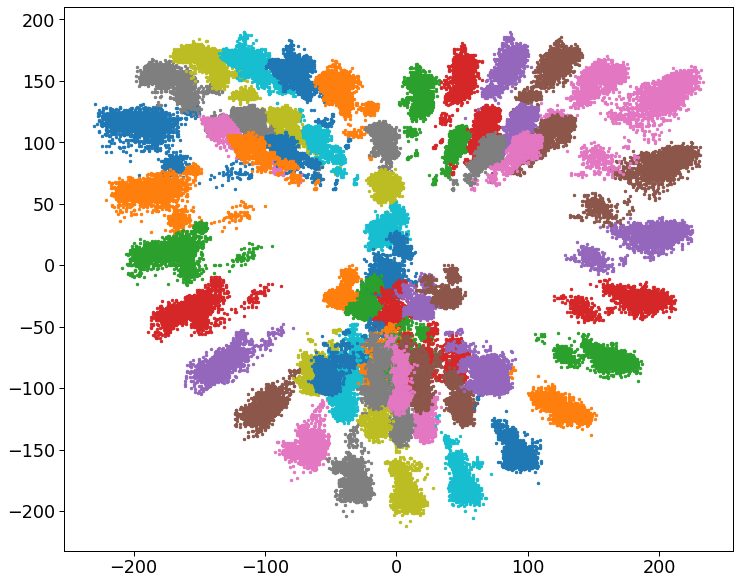

In [15]:
plt.rcParams["figure.figsize"] = (12,10)

import numpy.matlib
pt_r[:,:,0] = pt_r[:,:,0] - np.transpose(np.matlib.repmat(np.mean(pt_r[:,:,0],1),nl,1))
pt_r[:,:,1] = pt_r[:,:,1] - np.transpose(np.matlib.repmat(np.mean(pt_r[:,:,1],1),nl,1))

plt.plot(pt_r[:,:,0],-pt_r[:,:,1],'.')

ptr=np.reshape(pt_r,(len(pt_r),nl*2))
# Shouldnt we be aligning the face size too? the landmark sizes

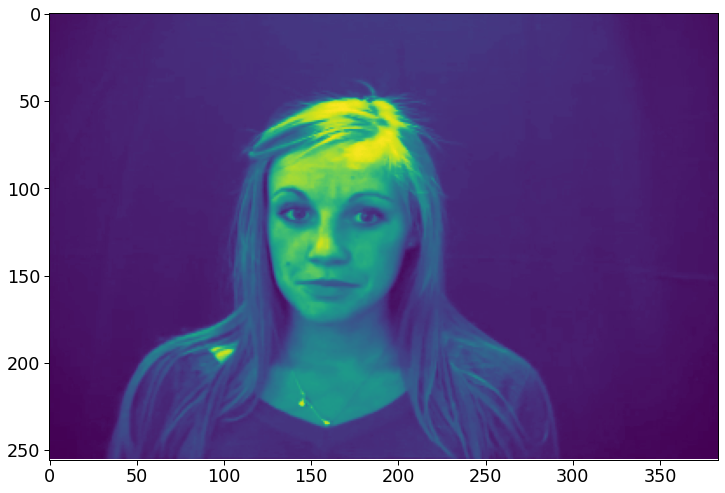

In [16]:
#f=np.reshape(f_aligned[4094,:,:,1],(256,256))
#ff=f_aligned[94][:,:,1]
#f=np.reshape(ff, (256,256))
plt.imshow(snapshot[94][:,:])

(2416, 4)


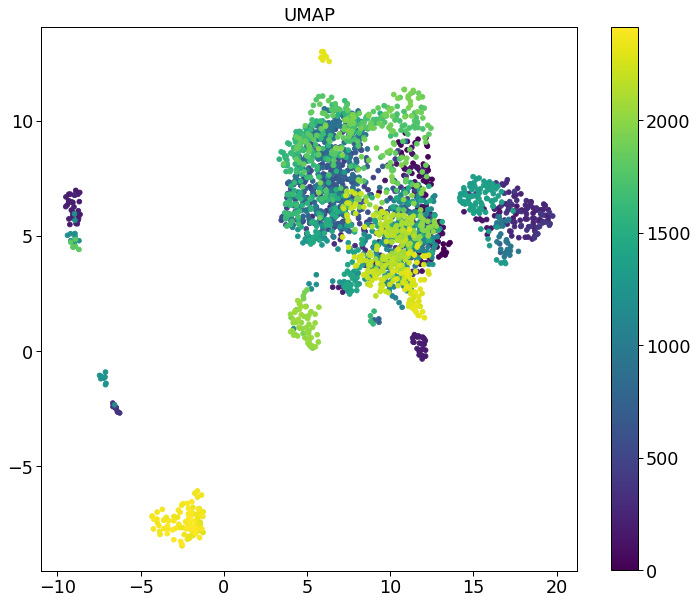

In [17]:
reducer = umap.UMAP(n_neighbors=10,min_dist=1,n_components=4,metric='euclidean',n_epochs=2000)
embedding = reducer.fit_transform(ptr)
print(np.shape(embedding))
#colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']
#plt.scatter(embedding[:, 0], embedding[:, 1])#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
t = np.arange(len(pt))


plt.title("UMAP", fontsize=18)
plt.scatter(embedding[:, 0], embedding[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

[[13.185626   4.6520834  3.9627957  6.3191733]
 [13.217148   4.4418917  3.8570945  6.243653 ]
 [12.417009   5.6583233  4.2046723  6.66007  ]
 ...
 [-1.9212804 -6.532831   1.9519125  9.141604 ]
 [-2.591711  -8.251363   1.6123785  8.939065 ]
 [-2.5162816 -8.376703   1.4902426  8.9762945]]


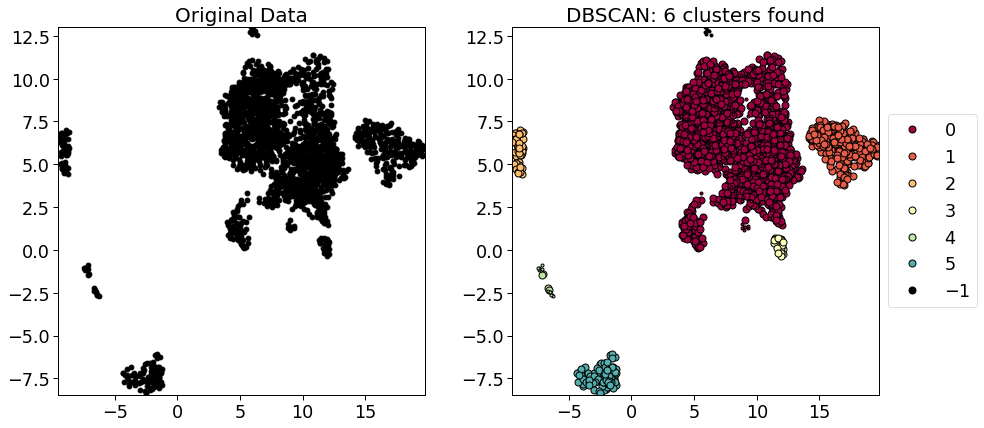

In [48]:
#import numpy as np
#import cv2
from sklearn.cluster import DBSCAN


# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(5, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y



# Generate some clusters!
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
#data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
data = embedding
print(data)
# Define max_distance (eps parameter in DBSCAN())
max_distance = 1.4
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7,label="$%d$" % k)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

In [73]:
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters)
#print('Estimated number of noise points: %d' % n_noise)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(embedding, labels))
s=metrics.silhouette_samples(embedding, labels)
plt.plot((s))
plt.show()
plt.plot(labels)
plt.plot(happiness_)
print(unique_index_length)
plt.show()

plt.subplot(121)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7,label="$%d$" % k)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.legend(loc='center right', bbox_to_anchor=(-0.1, 0.5))

plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[unique_index_length[0][0]:unique_index_length[0][0]+unique_index_length[0][1], 0], xy[unique_index_length[0][0]:unique_index_length[0][0]+unique_index_length[0][1], 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[unique_index_length[0][0]:unique_index_length[0][0]+unique_index_length[0][1], 0], xy[unique_index_length[0][0]:unique_index_length[0][0]+unique_index_length[0][1], 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title(' "Happiness" Points acc to Py-Feat' , fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

Estimated number of clusters: 6


ValueError: Found input variables with inconsistent numbers of samples: [2416, 2399]

### All the Happiness frames detected by Py-Feat falls into the largest cluster of DBSCAN output from dimensionally reduced landmark coordinate data

In [20]:
x={}
xx={}
sm={}#silhoutte measures
for c in range(n_clusters):
    x[c]=np.flatnonzero((labels == c)) 
    #xx[c]=np.take(snapshot, x[c],0)
    sm[c]=np.take(s, x[c],0)
    print("Mean silhouette Coefficient of cluster %d" % c ,"=", np.mean(sm[c]))    

Mean silhouette Coefficient of cluster 0 = 0.49377728
Mean silhouette Coefficient of cluster 1 = 0.78896976
Mean silhouette Coefficient of cluster 2 = 0.8897841
Mean silhouette Coefficient of cluster 3 = 0.9325677
Mean silhouette Coefficient of cluster 4 = 0.8675686
Mean silhouette Coefficient of cluster 5 = 0.7903875


In [59]:
from scipy.io import savemat,loadmat

In [60]:
print(np.shape(snapshot))
x1={}
xx1={}
for c in range(2):
    x1[c]=np.flatnonzero((happiness_ == c)) 
    xx1[c]=np.take(snapshot, x1[c],0)
    savemat("xx1"'%d.mat' %c ,{"data": xx1[c], "label": 'cluster %d' %c})
    savemat("x1"'%d.mat' %c ,{"label": x1[c], "label_": 'cluster %d' %c})
savemat("n_clusters.mat", {"clusters": 2, "label": "clusters"})

(2400, 256, 384)


In [61]:
# make videos from clusters
!pwd
!matlab -nodisplay -nosplash -nodesktop -r "run('./mat2video_3.m');exit;"

/home/devanand/FACE_VEC/FACE_VEC
=
                            < M A T L A B (R) >
                  Copyright 1984-2019 The MathWorks, Inc.
                  R2019b (9.7.0.1190202) 64-bit (glnxa64)
                              August 21, 2019

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
>

In [71]:
x={}
xx={}
labels=labels[0:2399]
for c in range(n_clusters):
    x[c]=np.flatnonzero((labels == c)) 
    xx[c]=np.take(snapshot, x[c],0)


savemat("n_clusters.mat", {"clusters": n_clusters, "label": "clusters"})


savemat("X_umap.mat", {"data": embedding, "label": "dimensionally reduced data"})


for c in range(n_clusters):
    savemat("xx"'%d.mat' %c ,{"data": xx[c], "label": 'cluster %d' %c})
    savemat("x"'%d.mat' %c ,{"label": x[c], "label_": 'cluster %d' %c})

In [72]:
# make videos from clusters
!pwd
!matlab -nodisplay -nosplash -nodesktop -r "run('./mat2video.m');exit;"

/home/devanand/FACE_VEC/FACE_VEC
=
                            < M A T L A B (R) >
                  Copyright 1984-2019 The MathWorks, Inc.
                  R2019b (9.7.0.1190202) 64-bit (glnxa64)
                              August 21, 2019

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
>